In [1]:
# !pip install transformers
# !pip install torch
# !pip install requests
# !pip install pillow


  Using cached transformers-4.38.1-py3-none-any.whl.metadata (131 kB)
  Using cached huggingface_hub-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
Using cached transformers-4.38.1-py3-none-any.whl (8.5 MB)
Using cached huggingface_hub-0.20.3-py3-none-any.whl (330 kB)
Using cached regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (777 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.3 MB/s eta 0:00:000:00:01m eta 0:00:01m
Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata 

In [1]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image


/home/suyodhan/Documents/Internship/image-similarity/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-24 16:37:35.823745: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-24 16:37:35.852627: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 16:37:36.069702: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, reb

In [2]:
processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model = AutoModel.from_pretrained('facebook/dinov2-base')



# processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base-imagenet1k-1-layer')
# model = AutoModel.from_pretrained('facebook/dinov2-base-imagenet1k-1-layer')


# processor = AutoImageProcessor.from_pretrained('facebook/dinov2-large')
# model = AutoModel.from_pretrained('facebook/dinov2-large')


In [77]:
image1 = Image.open("/home/suyodhan/Documents/Internship/image-similarity/New/Data/main/1.jpg")
image2 = Image.open("/home/suyodhan/Documents/Internship/image-similarity/New/Data/claim1/4.jpeg")


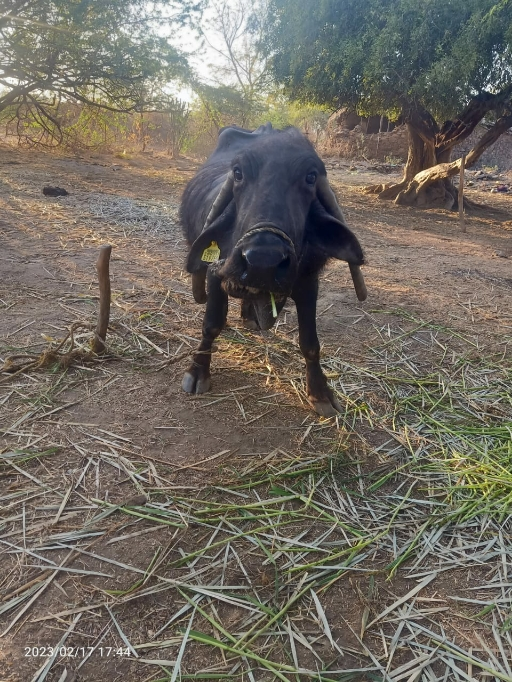

In [78]:
image1

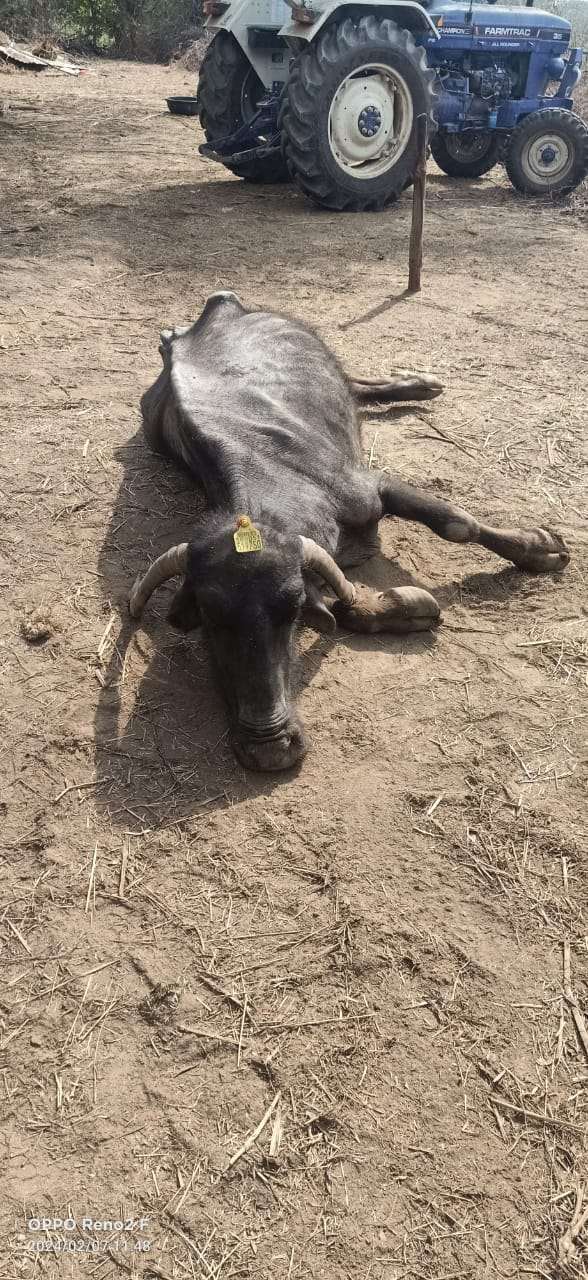

In [79]:
image2

In [80]:
inputs = processor(images=image1, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states_image1 = outputs.last_hidden_state




In [81]:
last_hidden_states_image1

tensor([[[-0.8639, -2.7020,  1.1973,  ...,  0.8042,  1.4577, -1.3015],
         [-2.4823, -3.7993, -0.5862,  ...,  0.6825, -0.4908, -1.9874],
         [-0.4141, -0.6699,  0.5729,  ...,  0.9899, -2.5385, -1.3484],
         ...,
         [-2.2641,  0.9997, -1.2449,  ..., -2.6705, -2.1018, -0.4840],
         [-1.0575,  0.5069, -2.4776,  ..., -2.5818, -1.4367, -0.5992],
         [-0.6827,  0.5448, -2.1918,  ..., -2.4058, -1.1707, -0.4534]]],
       grad_fn=<NativeLayerNormBackward0>)

In [82]:
inputs = processor(images=image2, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states_image2 = outputs.last_hidden_state

In [83]:
last_hidden_states_image2

tensor([[[-0.0485, -2.5139,  1.1926,  ...,  1.3917, -0.8486, -2.7771],
         [-0.5147, -2.0093,  0.3977,  ...,  0.5116, -0.3895, -0.9845],
         [-2.2836, -0.9047, -1.7220,  ...,  0.7109,  0.5751, -1.5814],
         ...,
         [-1.6731, -1.2013, -1.4686,  ...,  1.4045, -1.6007, -1.1620],
         [-2.0577,  0.4317, -1.9431,  ..., -1.5443, -1.1366,  0.5303],
         [-1.0967, -1.6261, -1.8007,  ...,  1.3760, -1.3359, -2.0450]]],
       grad_fn=<NativeLayerNormBackward0>)

In [84]:
# Assuming 'output' is your PyTorch tensor
array_image1 = last_hidden_states_image1.detach().numpy()

array_image2 = last_hidden_states_image2.detach().numpy()

In [85]:
# # Assuming 'array_image1' and 'array_image2' are your embeddings
# array_image11 = array_image1.squeeze()  # Remove the first dimension
# array_image22 = array_image2.squeeze()  # Remove the first dimension



In [86]:
# # Reshape the arrays to have a single dimension
# array_image1_flat = array_image1.reshape(1, -1)
# array_image2_flat = array_image2.reshape(1, -1)
array_image1_flat = array_image1.flatten()
array_image2_flat = array_image2.flatten()



In [87]:
array_image1_flat

array([-0.8639379 , -2.7020307 ,  1.1972591 , ..., -2.4058158 ,
       -1.1707298 , -0.45335913], dtype=float32)

In [88]:
import numpy as np


In [89]:
def cosine_similarity(image1_embedding, current_embedding) -> bool:
    # Handle case where one or both embeddings are None
    # if image1_embedding is None or current_embedding is None:
    #     return 0.0
    
    return np.dot(image1_embedding, current_embedding) / (np.linalg.norm(image1_embedding) * np.linalg.norm(current_embedding))

In [90]:
score = cosine_similarity(array_image1_flat, array_image2_flat)

In [91]:
score

0.3525556

In [92]:
##   0.3

0.3

0.3

In [2]:
!pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 455.9 kB/s eta 0:00:0000:0100:01


## Fine Tune

In [6]:
import torch
from torch.utils.data import DataLoader, random_split
from transformers import AutoModel, AutoTokenizer
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

# Load pre-trained DINOv2 model
model = AutoModel.from_pretrained('facebook/dinov2-base')

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transformations as needed
])

# Load your dataset
dataset = ImageFolder(root='/home/suyodhan/Documents/Internship/image-similarity/Dataset/Cattle Breeds', transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define fine-tuning parameters
num_epochs = 10
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Fine-tune the model
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.logits, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}')


: 

In [2]:
import logging